# Тема проекта

Анализ характеристик автомобилей различных брендов с целью выявления факторов, влияющих на стоимость.

# Описание проекта

Проект посвящен анализу характеристик автомобилей из датасета, включающего данные о различных брендах (Audi, BMW, Ford, Hyundai, Skoda и VW). Основная цель проекта – оптимизация ассортимента автомобилей для автосалона с целью максимизации прибыли.

# Цели и задачи проекта

**Цель:**
Оптимизация ассортимента автомобилей для автосалона с целью максимизации прибыли, основываясь на данных о характеристиках и продажах автомобилей. Автосалон стремится определить, какие автомобили следует оставить в продаже, а какие исключить, опираясь на такие критерии, как востребованность моделей, прибыльность, скорость продажи и стоимость владения.

**Задачи проекта:**
- Ознакомиться с датасетом, его структурой, размерами и характеристиками.
- Провести очистку данных, обработать пропуски, нормализовать и подготовить данные для анализа.
- Составить бизнес-задачу и с помощью анализа произвести оптимизацию ассортимента автомобилей.
- Провести визуализацию данных для наглядного представления ранее
полученных результатов.
- На основе анализа предложить рекомендации по оптимизации.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [103]:
st = pd.read_csv('cars_dataset.csv')
st

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [104]:
st.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [105]:
st.tail(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai
72434,Tucson,2016,15999,Automatic,11472,Diesel,125.0,57.6,1.7,Hyundai


In [106]:
st.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
36552,Focus,2017,11200,Manual,14341,Diesel,0.0,74.3,1.5,Ford
30976,EcoSport,2017,12200,Manual,18868,Petrol,125.0,52.3,1.0,Ford
62852,Fabia,2018,10900,Manual,8500,Petrol,150.0,64.2,1.0,skoda
7829,A3,2015,13775,Semi-Auto,34987,Petrol,20.0,60.1,1.4,audi
14137,3 Series,2019,25480,Semi-Auto,9309,Diesel,145.0,57.7,2.0,BMW


In [107]:
st.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Make             object
dtype: object

In [108]:
st.memory_usage()

Index              128
model           579480
year            579480
price           579480
transmission    579480
mileage         579480
fuelType        579480
tax             579480
mpg             579480
engineSize      579480
Make            579480
dtype: int64

In [109]:
st.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

In [110]:
st.shape


(72435, 10)

In [111]:
st.info

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType    tax   mpg  \
0           A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1           A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2           A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3           A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4           A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...        ...   ...    ...          ...      ...      ...    ...   ...   
72430      I30  2016   8680       Manual    25906   Diesel    0.0  78.4   
72431      I40  2015   7830       Manual    59508   Diesel   30.0  65.7   
72432      I10  2017   6830       Manual    13810   Petrol   20.0  60.1   
72433   Tucson  2018  13994       Manual    23313   Petrol  145.0  44.8   
72434   Tucson  2016  15999    Automatic    11472   Diesel  125.0  57.6   

       engineSize     Make  
0             1.4     audi  
1             2.0     audi  
2             1.4     audi  
3             2.0     audi  
4             1.0     audi  
...           ...      ...  
72430         1.6  Hyundai  
72431         1.7  Hyundai  
72432         1.0  Hyundai  
72433         1.6  Hyundai  
72434         1.7  Hyundai  

[72435 rows x 10 columns]>

In [112]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [113]:
st.duplicated().sum()

842

In [114]:
st.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

### **Выводы**


 Датасет содержит информацию о различных марках автомобилей, таких как Audi, BMW, Ford, Hyundai, Skoda и VW. Столбцы включают характеристики автомобилей, такие как марка, модель, год выпуска, цена, пробег и другие параметры. В датасете 35546 строк и 10 столбцов, объем памяти, который он занимает  165.9 MB.

* При проверке было выявлено, что столбцы не содержат пропущенные значения.

* Была проведена проверка на наличие дубликатов, которая показала, что в датасете присутствуют дублирующиеся строки (363). Дубликаты необходимо удалить, чтобы предотвратить искажение анализа данных.

**Рекомендации**
* Удалить дубликаты для предотвращения искажения данных.
* Провести детальный анализ аномальных значений и, при необходимости, скорректировать или удалить их.


## 2. Преобразования столбцов



In [115]:
st.rename(columns = { 'fuelType': 'fuel_type'}, inplace = True)
st.rename(columns = { 'engineSize': 'engine_size'}, inplace = True)
st.rename(columns = { 'Make': 'make'}, inplace = True)

st


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


## 3. Изменение типов данных

 Приведите весь текст в
датафрейме к единому (нижнему) регистру.

In [116]:
st.columns.str.lower()

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel_type', 'tax',
       'mpg', 'engine_size', 'make'],
      dtype='object')

In [117]:
for col in st.select_dtypes(include=['object']).columns:
    st[col] = st[col].str.lower()
st

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
1,a6,2016,16500,automatic,36203,diesel,20.0,64.2,2.0,audi
2,a1,2016,11000,manual,29946,petrol,30.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
4,a3,2019,17300,manual,1998,petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,i30,2016,8680,manual,25906,diesel,0.0,78.4,1.6,hyundai
72431,i40,2015,7830,manual,59508,diesel,30.0,65.7,1.7,hyundai
72432,i10,2017,6830,manual,13810,petrol,20.0,60.1,1.0,hyundai
72433,tucson,2018,13994,manual,23313,petrol,145.0,44.8,1.6,hyundai


 Проверим датафрейм на пропуски

In [118]:
st.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuel_type       0
tax             0
mpg             0
engine_size     0
make            0
dtype: int64

Изменение типа данных не требуется

## 4. Поиск дубликатов

In [119]:
dup = st.duplicated().sum()
print(dup)

842


## 5. Выводы к разделу 1



1. После загрузки данных, наименования столбцов были проверены и преобразованы в «змеиный регистр».

2. Все текстовые данные в датафрем были приведены к нижнему регистру.

3. Проверка на пропуски показала, что они отсутсвуют.

4. Типы данных в столбцах были проверены и не были изменены, так как все данные записаны корректно.

5. Была проведена проверка на наличие дубликатов в данных.



# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [120]:
# 1. Первые 8 строк
st.loc[:7]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
1,a6,2016,16500,automatic,36203,diesel,20.0,64.2,2.0,audi
2,a1,2016,11000,manual,29946,petrol,30.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
4,a3,2019,17300,manual,1998,petrol,145.0,49.6,1.0,audi
5,a1,2016,13900,automatic,32260,petrol,30.0,58.9,1.4,audi
6,a6,2016,13250,automatic,76788,diesel,30.0,61.4,2.0,audi
7,a4,2016,11750,manual,75185,diesel,20.0,70.6,2.0,audi


In [121]:
# 2. Строки c 10 до 16
st.loc[10:16]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
10,a3,2017,16100,manual,28955,petrol,145.0,58.9,1.4,audi
11,a6,2016,16500,automatic,52198,diesel,125.0,57.6,2.0,audi
12,q3,2016,17000,manual,44915,diesel,145.0,52.3,2.0,audi
13,a3,2017,16400,manual,21695,petrol,30.0,58.9,1.4,audi
14,a6,2015,15400,manual,47348,diesel,30.0,61.4,2.0,audi
15,a3,2017,14500,automatic,26156,petrol,145.0,58.9,1.4,audi
16,q3,2016,15700,automatic,28396,diesel,145.0,53.3,2.0,audi


In [122]:
# 3. Первые 5 строк и конкретный столбец
st.loc[1:5, 'model']

1     a6
2     a1
3     a4
4     a3
5     a1
Name: model, dtype: object

In [123]:
# 4. Содержимое конкретных столбцов
st.loc[:, 'model' :'year']

,model,year
0,a1,2017
1,a6,2016
2,a1,2016
3,a4,2017
4,a3,2019
...,...,...
72430,i30,2016
72431,i40,2015
72432,i10,2017
72433,tucson,2018


In [124]:
# 5. Выбор заданных столбцов и срез нескольких строк подряд
st.loc[1:1000, ['model', 'transmission']]

,model,transmission
1,a6,automatic
2,a1,manual
3,a4,automatic
4,a3,manual
5,a1,automatic
...,...,...
996,q2,semi-auto
997,a6,semi-auto
998,q5,semi-auto
999,a5,semi-auto


In [125]:
# 1. Логическая индексация, поиск по году
st.loc[st.loc[:, 'year'] == 2017]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
10,a3,2017,16100,manual,28955,petrol,145.0,58.9,1.4,audi
13,a3,2017,16400,manual,21695,petrol,30.0,58.9,1.4,audi
15,a3,2017,14500,automatic,26156,petrol,145.0,58.9,1.4,audi
...,...,...,...,...,...,...,...,...,...,...
72412,tucson,2017,14985,manual,42858,diesel,200.0,47.9,2.0,hyundai
72413,tucson,2017,14985,manual,38192,diesel,145.0,54.3,2.0,hyundai
72416,i40,2017,11485,manual,17393,diesel,145.0,65.7,1.7,hyundai
72417,i30,2017,10985,manual,14027,diesel,145.0,72.4,1.6,hyundai


In [126]:
# 2.
st.loc[st.loc[:, 'transmission'] == 'automatic'][['model', 'transmission']]

,model,transmission
1,a6,automatic
3,a4,automatic
5,a1,automatic
6,a6,automatic
11,a6,automatic
...,...,...
72406,santa fe,automatic
72409,tucson,automatic
72421,i20,automatic
72422,i30,automatic


In [127]:
# 3.
st.loc[(st.loc[:,'year'] > 2017) | (st.loc[:,'mileage'] < 50000)]


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
1,a6,2016,16500,automatic,36203,diesel,20.0,64.2,2.0,audi
2,a1,2016,11000,manual,29946,petrol,30.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
4,a3,2019,17300,manual,1998,petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72429,santa fe,2019,29995,semi-auto,1567,diesel,145.0,39.8,2.2,hyundai
72430,i30,2016,8680,manual,25906,diesel,0.0,78.4,1.6,hyundai
72432,i10,2017,6830,manual,13810,petrol,20.0,60.1,1.0,hyundai
72433,tucson,2018,13994,manual,23313,petrol,145.0,44.8,1.6,hyundai


In [128]:
# 4.
st.loc[(st.loc[:,'year'] > 2015) & (st.loc[:,'make'] == 'audi')]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
1,a6,2016,16500,automatic,36203,diesel,20.0,64.2,2.0,audi
2,a1,2016,11000,manual,29946,petrol,30.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
4,a3,2019,17300,manual,1998,petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
10663,a3,2020,16999,manual,4018,petrol,145.0,49.6,1.0,audi
10664,a3,2020,16999,manual,1978,petrol,150.0,49.6,1.0,audi
10665,a3,2020,17199,manual,609,petrol,150.0,49.6,1.0,audi
10666,q3,2017,19499,automatic,8646,petrol,150.0,47.9,1.4,audi


In [129]:
# 5.
st.loc[(st['year'] > 2015) & (st['mileage'] < 30000) & (st['price'] < 20000)]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
2,a1,2016,11000,manual,29946,petrol,30.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
4,a3,2019,17300,manual,1998,petrol,145.0,49.6,1.0,audi
9,a1,2016,12000,manual,22451,petrol,30.0,55.4,1.4,audi
...,...,...,...,...,...,...,...,...,...,...
72427,i10,2018,7200,manual,14788,petrol,150.0,60.1,1.0,hyundai
72430,i30,2016,8680,manual,25906,diesel,0.0,78.4,1.6,hyundai
72432,i10,2017,6830,manual,13810,petrol,20.0,60.1,1.0,hyundai
72433,tucson,2018,13994,manual,23313,petrol,145.0,44.8,1.6,hyundai


## 2. Сортировка данных

In [130]:
year = st.sort_values(by = 'year', ascending = False)
year

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
51695,up,2020,9999,manual,5000,petrol,145.0,54.3,1.0,vw
4023,tt,2020,43990,semi-auto,5000,petrol,145.0,35.3,2.0,audi
28764,fiesta,2020,18200,manual,10,petrol,145.0,49.6,1.0,ford
17906,2 series,2020,21875,semi-auto,7,petrol,150.0,50.4,1.5,bmw
50099,tiguan,2020,32427,semi-auto,678,diesel,150.0,31.4,2.0,vw
...,...,...,...,...,...,...,...,...,...,...
61264,land cruiser,1998,19990,manual,100000,diesel,265.0,23.9,4.2,toyota
10427,a8,1997,4650,automatic,122000,petrol,265.0,18.9,4.2,audi
20509,z3,1997,3950,manual,49000,petrol,270.0,35.3,1.9,bmw
38327,escort,1996,3000,manual,50000,petrol,265.0,34.4,1.8,ford


In [131]:
price = st.sort_values(by = 'price', ascending = False)
price


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
4783,r8,2020,145000,semi-auto,2000,petrol,145.0,21.1,5.2,audi
2255,r8,2020,137995,semi-auto,70,petrol,145.0,21.1,5.2,audi
4179,r8,2019,137500,semi-auto,10,petrol,150.0,21.4,5.2,audi
3367,r8,2019,135000,automatic,1000,petrol,145.0,32.8,5.2,audi
5459,r8,2020,133900,semi-auto,333,petrol,145.0,21.4,5.2,audi
...,...,...,...,...,...,...,...,...,...,...
38153,fiesta,2008,694,manual,82020,petrol,145.0,47.1,1.2,ford
35671,mondeo,2005,675,manual,97000,diesel,205.0,48.7,2.0,ford
38260,mondeo,2005,675,manual,108000,petrol,260.0,36.2,1.8,ford
38353,focus,2005,675,manual,121000,petrol,235.0,39.8,2.0,ford


In [132]:
mileage = st.sort_values(by = 'mileage', ascending = False)
mileage

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
9822,a6,2008,2490,manual,323000,diesel,200.0,44.1,2.0,audi
67377,octavia,2010,1190,manual,300000,diesel,125.0,57.6,1.9,skoda
66893,octavia,2010,1485,manual,250650,diesel,125.0,57.6,1.9,skoda
67400,octavia,2009,2750,automatic,241565,diesel,185.0,47.9,1.9,skoda
20087,x5,2012,7250,automatic,214000,diesel,300.0,37.7,3.0,bmw
...,...,...,...,...,...,...,...,...,...,...
49391,polo,2019,15799,manual,1,petrol,145.0,52.3,1.0,vw
32578,ecosport,2019,17900,semi-auto,1,petrol,145.0,45.6,1.0,ford
54400,jetta,2014,7985,manual,1,diesel,20.0,67.3,1.6,vw
52736,beetle,2001,899,automatic,1,petrol,325.0,29.7,2.0,vw


In [133]:
size = st.sort_values(by = 'engine_size', ascending = False)
size

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
20467,7 series,2017,57000,automatic,11297,petrol,145.0,22.1,6.6,bmw
20253,7 series,2017,52950,automatic,22000,petrol,150.0,22.1,6.6,bmw
10455,a8,2015,32000,automatic,30306,petrol,570.0,25.0,6.3,audi
4925,r8,2019,125000,semi-auto,500,petrol,145.0,21.4,5.2,audi
8630,r8,2018,95950,automatic,5044,petrol,150.0,23.0,5.2,audi
...,...,...,...,...,...,...,...,...,...,...
7519,q3,2020,37990,automatic,1500,petrol,145.0,30.7,0.0,audi
7521,q5,2020,49790,automatic,1500,petrol,135.0,117.7,0.0,audi
7542,q3,2019,31888,manual,2001,petrol,145.0,40.4,0.0,audi
7545,q2,2020,24988,automatic,1500,petrol,145.0,42.2,0.0,audi


In [134]:
mpg = st.sort_values(by = 'mpg', ascending = False)
mpg

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
13945,i3,2016,16482,automatic,43695,hybrid,0.0,470.8,0.0,bmw
19068,i3,2016,18999,automatic,9990,electric,0.0,470.8,0.0,bmw
15844,i3,2017,21444,automatic,22063,hybrid,0.0,470.8,0.0,bmw
16170,i3,2017,18995,automatic,33021,hybrid,0.0,470.8,0.0,bmw
21198,i3,2017,17600,automatic,50867,other,135.0,470.8,0.6,bmw
...,...,...,...,...,...,...,...,...,...,...
68383,ioniq,2020,23895,automatic,4152,hybrid,135.0,1.1,1.6,hyundai
72381,ioniq,2020,28995,automatic,5213,hybrid,135.0,1.1,1.6,hyundai
70525,ioniq,2020,26995,automatic,1290,hybrid,135.0,1.1,1.6,hyundai
67785,ioniq,2019,22998,automatic,2844,hybrid,140.0,1.1,1.6,hyundai


In [135]:
# Наибольшие значения
price.head(10)


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
4783,r8,2020,145000,semi-auto,2000,petrol,145.0,21.1,5.2,audi
2255,r8,2020,137995,semi-auto,70,petrol,145.0,21.1,5.2,audi
4179,r8,2019,137500,semi-auto,10,petrol,150.0,21.4,5.2,audi
3367,r8,2019,135000,automatic,1000,petrol,145.0,32.8,5.2,audi
5459,r8,2020,133900,semi-auto,333,petrol,145.0,21.4,5.2,audi
1646,r8,2019,129000,semi-auto,4000,petrol,145.0,21.4,5.2,audi
4925,r8,2019,125000,semi-auto,500,petrol,145.0,21.4,5.2,audi
3359,r8,2019,125000,automatic,100,petrol,145.0,24.1,5.2,audi
10468,r8,2019,125000,automatic,13663,petrol,150.0,21.4,5.2,audi
14306,2 series,2015,123456,semi-auto,33419,diesel,20.0,68.9,2.0,bmw


In [136]:
mileage.head(10)


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
9822,a6,2008,2490,manual,323000,diesel,200.0,44.1,2.0,audi
67377,octavia,2010,1190,manual,300000,diesel,125.0,57.6,1.9,skoda
66893,octavia,2010,1485,manual,250650,diesel,125.0,57.6,1.9,skoda
67400,octavia,2009,2750,automatic,241565,diesel,185.0,47.9,1.9,skoda
20087,x5,2012,7250,automatic,214000,diesel,300.0,37.7,3.0,bmw
52902,caravelle,2012,11995,semi-auto,212000,diesel,325.0,34.4,2.0,vw
44681,golf,2009,2250,manual,193000,diesel,160.0,52.3,2.0,vw
18981,3 series,2011,3493,manual,190000,diesel,20.0,68.9,2.0,bmw
20082,5 series,2013,8999,automatic,178987,hybrid,190.0,40.4,3.0,bmw
52893,caravelle,2006,7994,manual,178000,diesel,325.0,34.4,2.5,vw


In [137]:
year.head(10)


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
51695,up,2020,9999,manual,5000,petrol,145.0,54.3,1.0,vw
4023,tt,2020,43990,semi-auto,5000,petrol,145.0,35.3,2.0,audi
28764,fiesta,2020,18200,manual,10,petrol,145.0,49.6,1.0,ford
17906,2 series,2020,21875,semi-auto,7,petrol,150.0,50.4,1.5,bmw
50099,tiguan,2020,32427,semi-auto,678,diesel,150.0,31.4,2.0,vw
11141,m4,2020,48000,semi-auto,30,petrol,145.0,34.0,3.0,bmw
17902,z4,2020,31895,semi-auto,10,petrol,150.0,38.7,2.0,bmw
17900,2 series,2020,32895,semi-auto,1548,petrol,150.0,36.2,2.0,bmw
17899,3 series,2020,34985,semi-auto,1987,diesel,150.0,53.3,2.0,bmw
17894,2 series,2020,26400,semi-auto,150,petrol,145.0,42.2,1.5,bmw


In [138]:
size.head(10)


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
20467,7 series,2017,57000,automatic,11297,petrol,145.0,22.1,6.6,bmw
20253,7 series,2017,52950,automatic,22000,petrol,150.0,22.1,6.6,bmw
10455,a8,2015,32000,automatic,30306,petrol,570.0,25.0,6.3,audi
4925,r8,2019,125000,semi-auto,500,petrol,145.0,21.4,5.2,audi
8630,r8,2018,95950,automatic,5044,petrol,150.0,23.0,5.2,audi
7475,r8,2014,59990,automatic,31930,petrol,580.0,21.9,5.2,audi
4391,r8,2018,93950,semi-auto,3800,petrol,145.0,23.0,5.2,audi
10468,r8,2019,125000,automatic,13663,petrol,150.0,21.4,5.2,audi
4179,r8,2019,137500,semi-auto,10,petrol,150.0,21.4,5.2,audi
3939,r8,2019,112990,automatic,8175,petrol,145.0,21.6,5.2,audi


In [139]:
mpg.head(10)


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
13945,i3,2016,16482,automatic,43695,hybrid,0.0,470.8,0.0,bmw
19068,i3,2016,18999,automatic,9990,electric,0.0,470.8,0.0,bmw
15844,i3,2017,21444,automatic,22063,hybrid,0.0,470.8,0.0,bmw
16170,i3,2017,18995,automatic,33021,hybrid,0.0,470.8,0.0,bmw
21198,i3,2017,17600,automatic,50867,other,135.0,470.8,0.6,bmw
16948,i3,2017,22999,automatic,3976,hybrid,135.0,470.8,0.0,bmw
20592,i3,2016,16500,automatic,35446,hybrid,0.0,470.8,0.0,bmw
19288,i3,2017,19300,automatic,32867,other,0.0,470.8,0.6,bmw
19043,i3,2017,18999,automatic,20321,electric,135.0,470.8,0.0,bmw
17629,i3,2017,20495,automatic,20082,hybrid,135.0,470.8,0.0,bmw


In [140]:
# Наименьшие значения
price.tail(10)

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
35816,mondeo,2002,895,manual,136784,petrol,300.0,36.2,1.8,ford
60997,avensis,2003,850,manual,167054,diesel,205.0,48.7,2.0,toyota
38820,ka,2008,850,manual,77000,petrol,195.0,43.5,1.3,ford
38697,ka,2008,795,manual,76000,petrol,205.0,43.5,1.3,ford
38885,focus,2005,795,manual,71214,petrol,200.0,42.1,1.6,ford
38153,fiesta,2008,694,manual,82020,petrol,145.0,47.1,1.2,ford
35671,mondeo,2005,675,manual,97000,diesel,205.0,48.7,2.0,ford
38260,mondeo,2005,675,manual,108000,petrol,260.0,36.2,1.8,ford
38353,focus,2005,675,manual,121000,petrol,235.0,39.8,2.0,ford
38552,focus,2003,495,manual,177644,petrol,200.0,41.5,1.6,ford


In [141]:
mileage.tail(10)

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
40622,golf,2019,17898,manual,1,diesel,145.0,57.7,1.6,vw
44850,golf,2019,17000,manual,1,petrol,145.0,48.7,1.0,vw
5492,q7,2019,69000,automatic,1,diesel,145.0,30.1,4.0,audi
52391,up,2019,9889,manual,1,petrol,145.0,54.3,1.0,vw
49388,polo,2019,18495,automatic,1,petrol,145.0,46.3,1.0,vw
49391,polo,2019,15799,manual,1,petrol,145.0,52.3,1.0,vw
32578,ecosport,2019,17900,semi-auto,1,petrol,145.0,45.6,1.0,ford
54400,jetta,2014,7985,manual,1,diesel,20.0,67.3,1.6,vw
52736,beetle,2001,899,automatic,1,petrol,325.0,29.7,2.0,vw
44659,golf,2008,1299,manual,1,diesel,145.0,53.3,1.9,vw


In [142]:
year.tail(10)

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
57020,yaris,1999,1995,automatic,89000,petrol,160.0,42.9,1.3,toyota
20223,z3,1999,3995,manual,74282,petrol,245.0,35.3,1.9,bmw
9788,a3,1998,4999,automatic,55000,petrol,265.0,30.4,1.8,audi
34993,fiesta,1998,2699,manual,37000,petrol,160.0,41.5,1.2,ford
20510,z3,1998,3950,manual,56500,petrol,270.0,35.3,1.9,bmw
61264,land cruiser,1998,19990,manual,100000,diesel,265.0,23.9,4.2,toyota
10427,a8,1997,4650,automatic,122000,petrol,265.0,18.9,4.2,audi
20509,z3,1997,3950,manual,49000,petrol,270.0,35.3,1.9,bmw
38327,escort,1996,3000,manual,50000,petrol,265.0,34.4,1.8,ford
20293,5 series,1996,5995,automatic,36000,petrol,270.0,26.4,2.8,bmw


In [143]:
size.tail(10)

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
37928,ka,2018,8444,manual,17000,petrol,145.0,57.7,0.0,ford
37929,focus,2018,12999,manual,11000,petrol,145.0,60.1,0.0,ford
7516,q3,2020,29944,manual,1500,petrol,145.0,40.9,0.0,audi
7517,q3,2020,33333,automatic,1500,diesel,145.0,47.1,0.0,audi
7518,q3,2020,29944,automatic,1500,petrol,145.0,32.5,0.0,audi
7519,q3,2020,37990,automatic,1500,petrol,145.0,30.7,0.0,audi
7521,q5,2020,49790,automatic,1500,petrol,135.0,117.7,0.0,audi
7542,q3,2019,31888,manual,2001,petrol,145.0,40.4,0.0,audi
7545,q2,2020,24988,automatic,1500,petrol,145.0,42.2,0.0,audi
16948,i3,2017,22999,automatic,3976,hybrid,135.0,470.8,0.0,bmw


In [144]:
mpg.tail(10)

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
61132,hilux,2020,18495,manual,50,diesel,260.0,2.8,2.4,toyota
61146,hilux,2019,20500,manual,5190,diesel,260.0,2.8,2.4,toyota
61187,hilux,2020,36995,automatic,150,diesel,260.0,2.8,2.4,toyota
61122,hilux,2019,28495,automatic,3350,diesel,260.0,2.8,2.4,toyota
61145,hilux,2019,26500,automatic,7123,diesel,260.0,2.8,2.4,toyota
68383,ioniq,2020,23895,automatic,4152,hybrid,135.0,1.1,1.6,hyundai
72381,ioniq,2020,28995,automatic,5213,hybrid,135.0,1.1,1.6,hyundai
70525,ioniq,2020,26995,automatic,1290,hybrid,135.0,1.1,1.6,hyundai
67785,ioniq,2019,22998,automatic,2844,hybrid,140.0,1.1,1.6,hyundai
53917,golf sv,2019,17950,manual,100,petrol,145.0,0.3,1.0,vw


# Вывод
* Audi и BMW принадлежат к дорогому сегменту рынка и пользуются популярностью у покупателей с высокими запросами и большим бюджетом. А недорогие автомобили покупают люди с ограниченным бюджетом.

* Автомобили с большим пробегом более изношены. Этот показатель
определяет его стоимость. Автомобили с маленьким пробегом - новые или почти неэксплуатируемые, они отлично подойдут покупателям, которые любят новизну.

* Новые автомобили, имеют более высокую цену и улучшенные технологии. Это важно для покупателей, которые ищут современные автомобили. А старые и недорогие автомобили требуют больше затрат на обслуживание. Они подойдут покупателям, которые готовы к дополнительным затратам на ремонт.

* BMW это автомобиль с наибольшим объемом двигателя, он чаще используются для спортивных условий эксплуатации.А автомобили с наименьшим объемом двигателя более экономичны. Они используются для городских условий эксплуатации.

* Показатель MPG (миль на галлон) важен для покупателей, которые ищут экономичные автомобили.


Этот анализ помогает понять различные аспекты рынка автомобилей, включая сегменты премиум и бюджетных автомобилей, а также характеристики, важные для разных типов покупателей. Это необходимо для принятия обоснованных решений при покупке и продаже автомобилей.

## 3. Фильтрация данных

**Бизнес-задача:**

Оптимизация ассортимента автомобилей для сети автосалонов:
Автосалоны хотят оптимизировать свой ассортимент автомобилей для максимизации прибыли.
Цель анализа: Определить, какие автомобили и с какими характеристиками наиболее выгодны для автосалона, чтобы улучшить продажи и оптимизировать ассортимент автомобилей в салоне.

**Анализ данных:**

- Проанализировать распределение цен автомобилей разных брендов.
- Исследовать влияние пробега на цену автомобиля.
- Определить, как различные типы топлива влияют на спрос и цену автомобиля.
- Исследовать средние цены и предпочтения клиентов по маркам автомобилей.


**Автомобили котрые следует оставить в продаже:**

- Выявить автомобили марки Audi с ценой до $25000, которые наиболее популярны среди покупателей.

- Автомобили с объемом двигателя более 1.4 литров и новее 2012 года и ценой меньше $20000.

- Отфильтровать машины с бензиновым двигателем и объемом двигателя более 1.4 литра.

- Определить автомобили класса "премиум" (цена свыше $40000) марки BMW, которые пользуются наибольшим спросом среди клиентов с доходом выше среднего  и новее 2012 года.

- Найти автомобили выпущенные с 2004 по 2020 год.

- Выявить автомобили с бензиновым двигателем и пробегом менее 10000 км.

**Автомобили котрые следует исключить из ассортимента:**

- Автомобили с ценой выше $30000 и годом выпуска до 2004 года

- Определить автомобили с объемом двигателя менее 1 литра.

- Обнаружить автомобили с автоматической трансмиссией и пробегом более 200000 км.
- Отфильтровать автомобили с дизильным двигателем и старее 2004 года.

- Найти автомобили выпущенные до 2004 года.

**Общий анализ данных:**

- Определить среднюю стоимость каждой марки.

- Выявить влияние года выпуска на стоимость автомобиля.

- Выявить влияние пробега на стоимость автомобиля.

- Отфильтровать числовые стобцы сначала по возрастанию, а затем по убыванию.



In [145]:
# 1. Автомобили марки audi с ценой меньше $25000
st.query("make == 'audi' and price < 25000")

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017,12500,manual,15735,petrol,150.0,55.4,1.4,audi
1,a6,2016,16500,automatic,36203,diesel,20.0,64.2,2.0,audi
2,a1,2016,11000,manual,29946,petrol,30.0,55.4,1.4,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
4,a3,2019,17300,manual,1998,petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
10663,a3,2020,16999,manual,4018,petrol,145.0,49.6,1.0,audi
10664,a3,2020,16999,manual,1978,petrol,150.0,49.6,1.0,audi
10665,a3,2020,17199,manual,609,petrol,150.0,49.6,1.0,audi
10666,q3,2017,19499,automatic,8646,petrol,150.0,47.9,1.4,audi


In [146]:
# 2. Автомобили с ценой выше $30000 и годом выпуска до 2004 года
st.query("price < 30000 and year < 2004")

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
7750,a6,2003,2495,automatic,117000,diesel,290.0,39.8,2.5,audi
9359,a6,2003,2495,manual,129000,diesel,325.0,31.7,2.5,audi
9523,tt,2002,2876,manual,99000,petrol,295.0,30.1,1.8,audi
9788,a3,1998,4999,automatic,55000,petrol,265.0,30.4,1.8,audi
9810,tt,2003,6490,automatic,43000,petrol,325.0,28.8,3.2,audi
...,...,...,...,...,...,...,...,...,...,...
71884,accent,2000,1295,automatic,47000,petrol,150.0,38.7,1.3,hyundai
71889,getz,2003,2395,automatic,59000,petrol,260.0,37.2,1.3,hyundai
72127,terracan,2003,3290,manual,78000,diesel,325.0,32.8,2.9,hyundai
72280,santa fe,2002,1200,manual,94000,petrol,325.0,30.4,2.4,hyundai


In [147]:
# 3. Автомобили с объемом двигателя более 1.4 литров и новее 2012 года и ценой меньше $20000
st.query("year >= 2012 and engine_size > 1.4 and price < 20000")

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
1,a6,2016,16500,automatic,36203,diesel,20.0,64.2,2.0,audi
3,a4,2017,16800,automatic,25952,diesel,145.0,67.3,2.0,audi
6,a6,2016,13250,automatic,76788,diesel,30.0,61.4,2.0,audi
7,a4,2016,11750,manual,75185,diesel,20.0,70.6,2.0,audi
11,a6,2016,16500,automatic,52198,diesel,125.0,57.6,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
72428,tucson,2016,12495,manual,35000,diesel,30.0,61.7,1.7,hyundai
72430,i30,2016,8680,manual,25906,diesel,0.0,78.4,1.6,hyundai
72431,i40,2015,7830,manual,59508,diesel,30.0,65.7,1.7,hyundai
72433,tucson,2018,13994,manual,23313,petrol,145.0,44.8,1.6,hyundai


In [148]:
# 4. Автомобили с бензиновым двигателем и объемом более 1.4 литра
st.query("fuel_type == 'petrol' and engine_size > 1.4 and year >= 2004")

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
46,a6,2018,16600,automatic,22958,petrol,145.0,50.4,1.8,audi
48,a5,2017,20200,automatic,13057,petrol,145.0,53.3,2.0,audi
49,s4,2017,23700,automatic,20278,petrol,145.0,38.7,3.0,audi
55,a3,2015,15000,automatic,56291,petrol,200.0,42.8,1.8,audi
65,a3,2018,18950,manual,17992,petrol,150.0,54.3,1.5,audi
...,...,...,...,...,...,...,...,...,...,...
72390,tucson,2016,10998,manual,22665,petrol,160.0,44.8,1.6,hyundai
72392,i30,2019,23340,manual,498,petrol,145.0,34.0,2.0,hyundai
72401,tucson,2016,10998,manual,32125,petrol,160.0,44.8,1.6,hyundai
72402,ix20,2014,7495,automatic,19319,petrol,200.0,43.6,1.6,hyundai


In [149]:
# 5. Автомобили BMW  с ценой ниже $40000 и новее 2012 года
st.query("make == 'bmw' and price < 40000 and year >= 2012")

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
10668,5 series,2014,11200,automatic,67068,diesel,125.0,57.6,2.0,bmw
10669,6 series,2018,27000,automatic,14827,petrol,145.0,42.8,2.0,bmw
10670,5 series,2016,16000,automatic,62794,diesel,160.0,51.4,3.0,bmw
10671,1 series,2017,12750,automatic,26676,diesel,145.0,72.4,1.5,bmw
10672,7 series,2014,14500,automatic,39554,diesel,160.0,50.4,3.0,bmw
...,...,...,...,...,...,...,...,...,...,...
21444,x3,2016,19000,automatic,40818,diesel,150.0,54.3,2.0,bmw
21445,5 series,2016,14600,automatic,42947,diesel,125.0,60.1,2.0,bmw
21446,3 series,2017,13100,manual,25468,petrol,200.0,42.8,2.0,bmw
21447,1 series,2014,9930,automatic,45000,diesel,30.0,64.2,2.0,bmw


# Пример использования where

In [150]:
# 1. Автомобили, выпущенные с 2004 по 2020 год
st.where((st['year'] >= 2004) & (st['year'] <= 2020)).dropna()

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017.0,12500.0,manual,15735.0,petrol,150.0,55.4,1.4,audi
1,a6,2016.0,16500.0,automatic,36203.0,diesel,20.0,64.2,2.0,audi
2,a1,2016.0,11000.0,manual,29946.0,petrol,30.0,55.4,1.4,audi
3,a4,2017.0,16800.0,automatic,25952.0,diesel,145.0,67.3,2.0,audi
4,a3,2019.0,17300.0,manual,1998.0,petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,i30,2016.0,8680.0,manual,25906.0,diesel,0.0,78.4,1.6,hyundai
72431,i40,2015.0,7830.0,manual,59508.0,diesel,30.0,65.7,1.7,hyundai
72432,i10,2017.0,6830.0,manual,13810.0,petrol,20.0,60.1,1.0,hyundai
72433,tucson,2018.0,13994.0,manual,23313.0,petrol,145.0,44.8,1.6,hyundai


In [151]:
# 2. Автомобили, выпущенные до 2004 года
st.where(st['year'] < 2004).dropna()

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
7750,a6,2003.0,2495.0,automatic,117000.0,diesel,290.0,39.8,2.5,audi
9359,a6,2003.0,2495.0,manual,129000.0,diesel,325.0,31.7,2.5,audi
9523,tt,2002.0,2876.0,manual,99000.0,petrol,295.0,30.1,1.8,audi
9788,a3,1998.0,4999.0,automatic,55000.0,petrol,265.0,30.4,1.8,audi
9810,tt,2003.0,6490.0,automatic,43000.0,petrol,325.0,28.8,3.2,audi
...,...,...,...,...,...,...,...,...,...,...
71884,accent,2000.0,1295.0,automatic,47000.0,petrol,150.0,38.7,1.3,hyundai
71889,getz,2003.0,2395.0,automatic,59000.0,petrol,260.0,37.2,1.3,hyundai
72127,terracan,2003.0,3290.0,manual,78000.0,diesel,325.0,32.8,2.9,hyundai
72280,santa fe,2002.0,1200.0,manual,94000.0,petrol,325.0,30.4,2.4,hyundai


In [152]:
# 3. Автомобили с бензиновым двигателем и пробегом менее 10000 км
st.where((st['fuel_type'] == 'petrol') & (st['mileage'] < 100000)).dropna()


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
0,a1,2017.0,12500.0,manual,15735.0,petrol,150.0,55.4,1.4,audi
2,a1,2016.0,11000.0,manual,29946.0,petrol,30.0,55.4,1.4,audi
4,a3,2019.0,17300.0,manual,1998.0,petrol,145.0,49.6,1.0,audi
5,a1,2016.0,13900.0,automatic,32260.0,petrol,30.0,58.9,1.4,audi
8,a3,2015.0,10200.0,manual,46112.0,petrol,20.0,60.1,1.4,audi
...,...,...,...,...,...,...,...,...,...,...
72425,i10,2018.0,7200.0,manual,17879.0,petrol,145.0,60.1,1.0,hyundai
72426,i10,2018.0,7995.0,manual,8851.0,petrol,145.0,60.1,1.0,hyundai
72427,i10,2018.0,7200.0,manual,14788.0,petrol,150.0,60.1,1.0,hyundai
72432,i10,2017.0,6830.0,manual,13810.0,petrol,20.0,60.1,1.0,hyundai


In [153]:
# 4. Автомобили с объемом двигателя менее 1 литра
st.where(st['engine_size'] < 1).dropna()

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
7505,q5,2019.0,44790.0,automatic,5886.0,petrol,135.0,117.7,0.0,audi
7506,q3,2019.0,32788.0,automatic,1500.0,diesel,145.0,47.1,0.0,audi
7516,q3,2020.0,29944.0,manual,1500.0,petrol,145.0,40.9,0.0,audi
7517,q3,2020.0,33333.0,automatic,1500.0,diesel,145.0,47.1,0.0,audi
7518,q3,2020.0,29944.0,automatic,1500.0,petrol,145.0,32.5,0.0,audi
...,...,...,...,...,...,...,...,...,...,...
71861,tucson,2016.0,11500.0,manual,52455.0,diesel,30.0,61.7,0.0,hyundai
71865,i800,2018.0,15500.0,manual,31312.0,diesel,145.0,31.7,0.0,hyundai
71867,i10,2015.0,5300.0,manual,47660.0,petrol,20.0,60.1,0.0,hyundai
71868,i10,2019.0,9400.0,manual,4419.0,petrol,145.0,60.1,0.0,hyundai


In [154]:
# 5. Автомобили с автоматической трансмиссией и пробегом более 200000 км
st.where((st['transmission'] == 'automatic') & (st['mileage'] > 200000)).dropna()

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
20087,x5,2012.0,7250.0,automatic,214000.0,diesel,300.0,37.7,3.0,bmw
67400,octavia,2009.0,2750.0,automatic,241565.0,diesel,185.0,47.9,1.9,skoda


In [155]:
# 5. Автомобили с дизильным двигателем и новее 2004 года
st.where((st['fuel_type'] == 'diesel')& (st['year'] > 2004)).dropna()

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,make
1,a6,2016.0,16500.0,automatic,36203.0,diesel,20.0,64.2,2.0,audi
3,a4,2017.0,16800.0,automatic,25952.0,diesel,145.0,67.3,2.0,audi
6,a6,2016.0,13250.0,automatic,76788.0,diesel,30.0,61.4,2.0,audi
7,a4,2016.0,11750.0,manual,75185.0,diesel,20.0,70.6,2.0,audi
11,a6,2016.0,16500.0,automatic,52198.0,diesel,125.0,57.6,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
72428,tucson,2016.0,12495.0,manual,35000.0,diesel,30.0,61.7,1.7,hyundai
72429,santa fe,2019.0,29995.0,semi-auto,1567.0,diesel,145.0,39.8,2.2,hyundai
72430,i30,2016.0,8680.0,manual,25906.0,diesel,0.0,78.4,1.6,hyundai
72431,i40,2015.0,7830.0,manual,59508.0,diesel,30.0,65.7,1.7,hyundai


## 4. Сводные таблицы

In [156]:
# Сводная таблица, показывающая средний объем двигателя разных марок
st.pivot_table(index = ['make'], values = ['engine_size'])

,engine_size
make,
audi,1.930709
bmw,2.167767
ford,1.350824
hyundai,1.457922
skoda,1.433509
toyota,1.471297
vw,1.600693


In [157]:
# Сводная таблица, которая показывает средний пробег автомобилей с разными коробками передач
st.pivot_table(index = ['transmission'], values = ['mileage'])

,mileage
transmission,
automatic,23371.080948
manual,25075.465540
other,18481.750000
semi-auto,17682.587868


## 5. Группировка данных, агрегатные функции

Группируем данные по столбцу "make" (марка автомобиля).
Для столбцов price (цена) и mileage (пробег) выполняются четыре агрегатные функции: сумма, среднее, минимальное и максимальное значения.

In [158]:
st.groupby('make').agg({'price': ['sum', 'mean', 'min', 'max']})

price                            
               sum          mean   min     max
make                                          
audi     244261836  22896.685039  1490  145000
bmw      245088881  22733.408867  1200  123456
ford     220599329  12280.078435   495   54995
hyundai   61965637  12750.131070  1200   92000
skoda     89464241  14275.449338   995   91874
toyota    84375871  12522.391066   850   59995
vw       255228001  16838.952365   899   69994

In [159]:
st.groupby('make').agg({'mileage': ['sum', 'mean', 'min', 'max']})

mileage                          
               sum          mean min     max
make                                        
audi     264857039  24827.244001   1  323000
bmw      274883012  25496.986550   1  214000
ford     419672815  23361.880149   1  177644
hyundai  104422201  21486.049588   1  138000
skoda    126082339  20118.452050   5  300000
toyota   154013255  22857.413921   2  174419
vw       334860352  22092.785644   1  212000

## 6. Поиск закономерностей, варианты решения бизнес-задачи

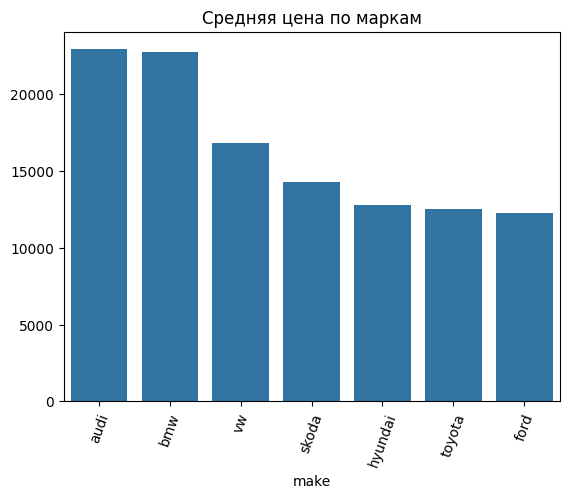

In [160]:
# Средняя цена по маркам
make_price = st.groupby('make')['price'].mean().sort_values(ascending=False)
sns.barplot(x = make_price.index, y = make_price.values)
plt.title("Средняя цена по маркам")
plt.xticks(rotation = 70)
plt.show()

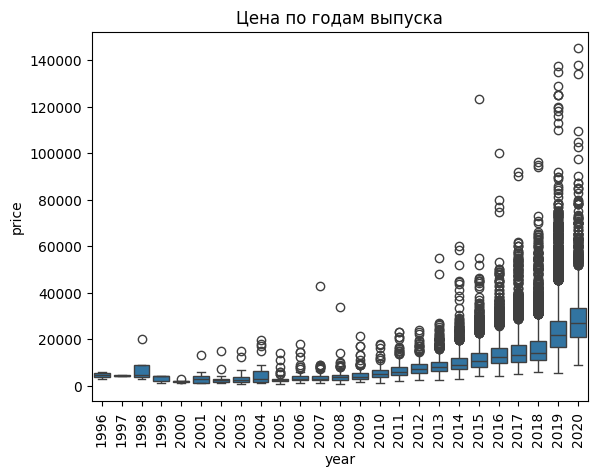

In [161]:
# Влияние года выпуска на цену
sns.boxplot(x = 'year', y = 'price', data = st)
plt.title("Цена по годам выпуска")
plt.xticks(rotation = 90)
plt.show()

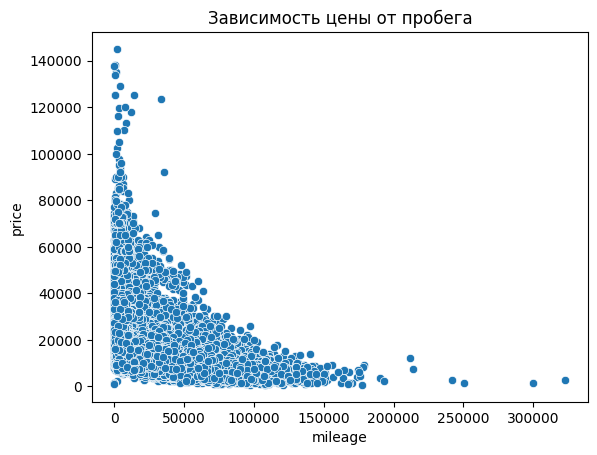

In [162]:
# Зависимость цены от пробега
sns.scatterplot(x = 'mileage', y = 'price', data = st)
plt.title("Зависимость цены от пробега")
plt.show()

## 7. Выводы к разделу 2

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

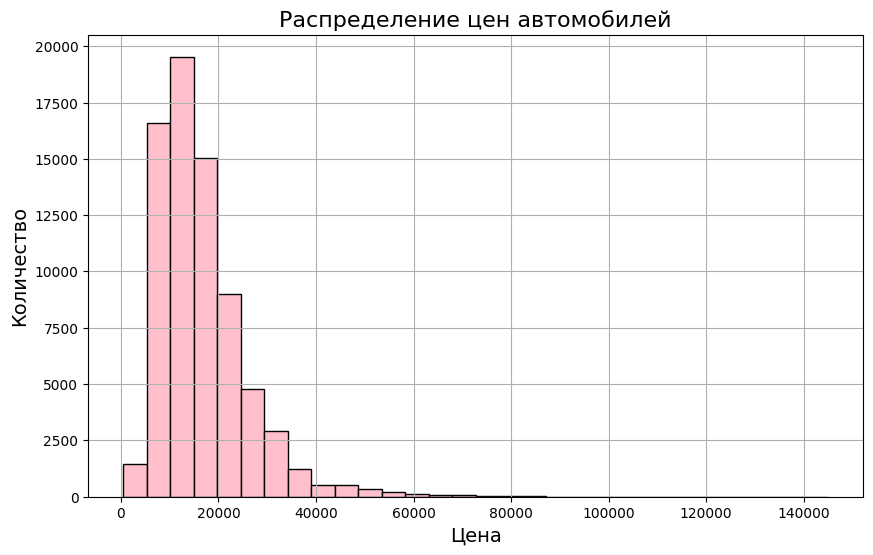

In [163]:
# Диаграмма 1: Распределение цен автомобилей
plt.figure(figsize=(10, 6))
plt.hist(st['price'], bins = 30, color = 'pink', edgecolor = 'black')
plt.title('Распределение цен автомобилей', fontsize = 16)
plt.xlabel('Цена', fontsize = 14)
plt.ylabel('Количество', fontsize  =14)
plt.grid(True)
plt.show()


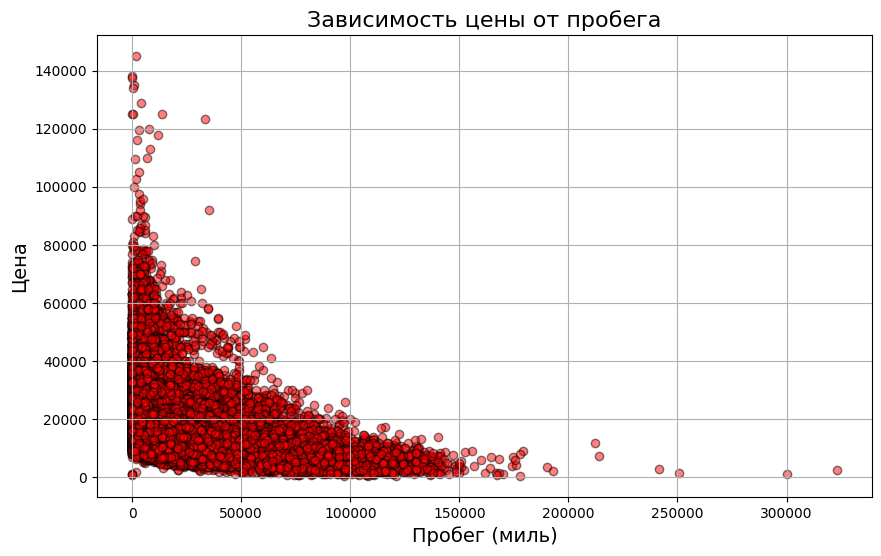

In [164]:
# Диаграмма 2: График зависимости цены от пробега
plt.figure(figsize=(10, 6))
plt.scatter(st['mileage'], st['price'], color = 'red', edgecolor = 'black', alpha=0.5)
plt.title('Зависимость цены от пробега', fontsize = 16)
plt.xlabel('Пробег (миль)', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.grid(True)
plt.show()

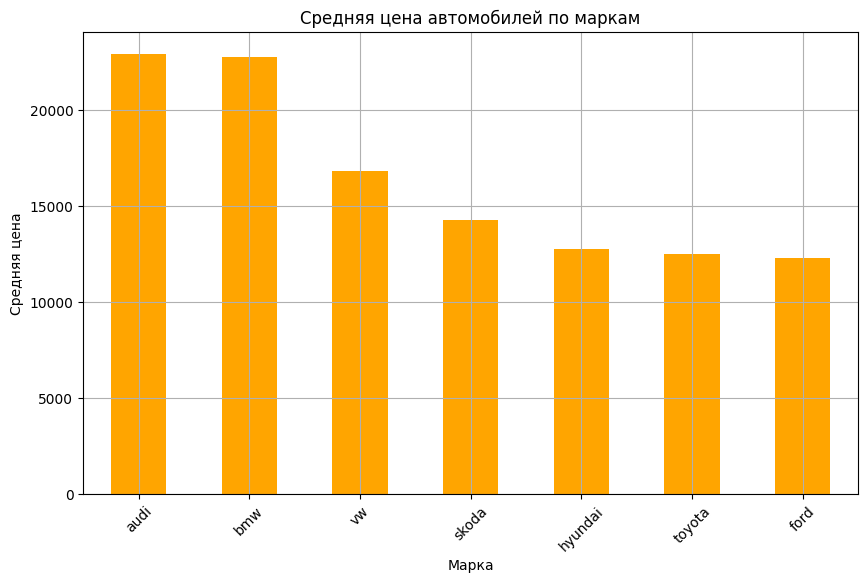

In [165]:
# Диаграмма 3: Средняя цена автомобилей по маркам
brands = st.groupby('make')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
brands.plot(kind = 'bar', color = 'orange')
plt.title('Средняя цена автомобилей по маркам')
plt.xlabel('Марка')
plt.ylabel('Средняя цена')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## 2. Диаграммы, библиотека Seaborn

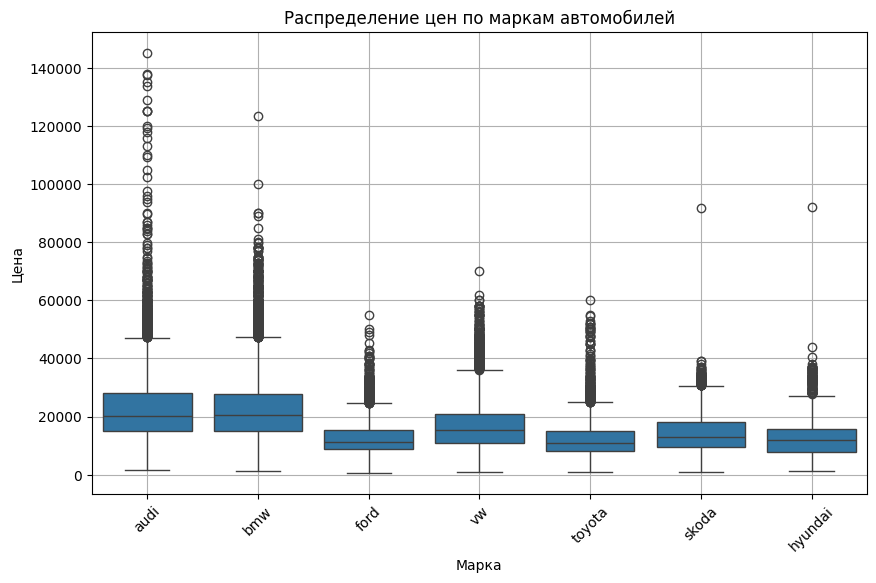

In [166]:
# Диаграмма 1: Распределение цен автомобилей по маркам
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'make', y = 'price', data = st)
plt.title('Распределение цен по маркам автомобилей')
plt.xlabel('Марка')
plt.ylabel('Цена')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

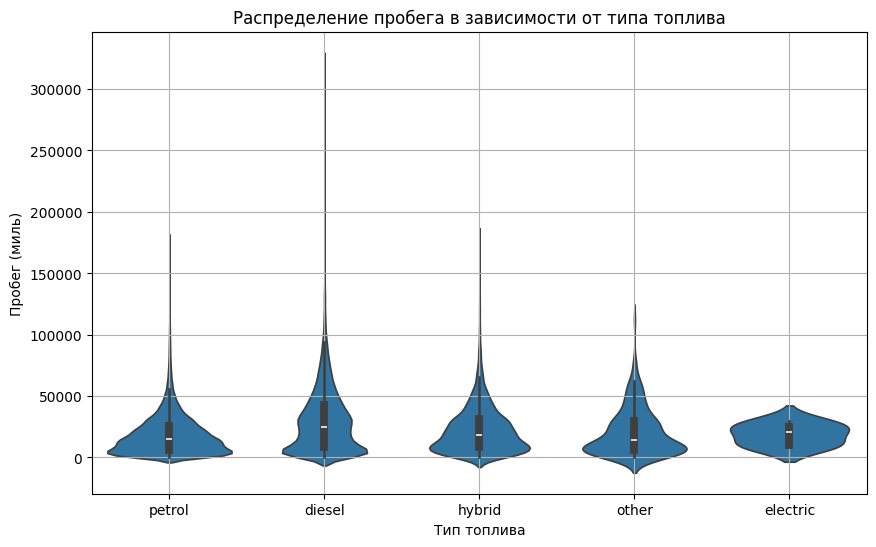

In [167]:
# Диаграмма 2: Диаграмма распределения пробега в зависимости от типа топлива
plt.figure(figsize=(10, 6))
sns.violinplot( x ='fuel_type', y ='mileage', data = st)
plt.title('Распределение пробега в зависимости от типа топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Пробег (миль)')
plt.grid(True)
plt.show()

Эти графики помогут наглядно проанализировать данные и сделать выводы о ценообразовании, влиянии пробега и других характеристик на стоимость автомобилей.

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

На основе анализируемых данных можно выделить основные характеристики 'портрета' типичного потребителя автомобилей:

Преобладание автомобилей в среднем ценовом сегменте: Гистограмма распределения цен показывает, что большинство автомобилей находятся в диапазоне от 10 до 30 тысяч долларов. Это указывает на то, что основной целевой аудиторией являются покупатели со средним доходом, которые ищут надежные и доступные автомобили.

Зависимость цены от пробега показывает, что по мере увеличения пробега автомобиля его цена значительно падает. Это предполагает, что покупатели склонны ориентироваться на меньший пробег, что делает их более заинтересованными в автомобилях с относительно небольшим износом.

Средние цены по маркам автомобилей демонстрирует, что премиальные марки (такие как Audi и BMW) обладают более высокой средней стоимостью, что говорит о наличии группы потребителей, готовых платить больше за премиальные автомобили. Однако автомобили марок Hyundai и Skoda, которые имеют более низкую среднюю цену, также являются популярными среди покупателей с ограниченным бюджетом.

Предпочтения по типу топлива. Автомобили с дизельным двигателем показывают более высокие пробеги, что говорит о том, что эти автомобили могут быть привлекательны для водителей, совершающих долгие поездки.

Из диаграмм следует, что потребители ориентированы на экономичные автомобили с небольшим пробегом, при этом ценя как доступные, так и более премиальные варианты.

Таким образом, "портрет" типичного потребителя в данной предметной области может быть охарактеризован следующим образом: это покупатель, ориентированный на автомобили среднего ценового сегмента с относительно небольшим пробегом, который ценит как доступные бренды (Hyundai, Skoda), так и готов рассматривать более дорогие премиальные марки (Audi, BMW) в зависимости от своих финансовых возможностей и предпочтений по бренду и типу топлива.

# Общий вывод по проекту

Анализ данных, проведенный на основе датасета, содержащего информацию об автомобилях марок Audi, BMW, Ford, Hyundai, Skoda и Volkswagen, позволил выявить ключевые тенденции, которые могут существенно повлиять на стратегию сети автосалонов по оптимизации ассортимента.

**Основные выводы:**
**Избавление от старых автомобилей:** Данные показывают, что автомобили старше определенного возраста значительно теряют в цене и становятся менее привлекательными для покупателей. Более старые автомобили часто ассоциируются с более высокими затратами на обслуживание и ремонты, что снижает их привлекательность для клиентов. Учитывая это, рекомендуется сократить количество старых автомобилей в ассортименте, чтобы освободить место для более новых моделей, которые быстрее находят своих покупателей и приносят больше прибыли.

**Автомобили с большим пробегом:** Автомобили с высоким пробегом также демонстрируют снижение цены и спроса. Большой пробег часто указывает на износ автомобиля и возможные предстоящие расходы на техническое обслуживание. Покупатели предпочитают автомобили с меньшим пробегом, так как они воспринимаются как более надежные и долговечные. Таким образом, целесообразно минимизировать наличие автомобилей с большим пробегом на складе, сосредоточив внимание на моделях с пробегом ниже среднего, что повышает вероятность их продажи по более высокой цене.

**Оптимизация ассортимента по маркам:** Анализ также показал, что некоторые марки, такие как Audi и BMW, остаются популярными, несмотря на их более высокую цену. Однако модели с завышенной ценой и низким спросом среди покупателей премиум-сегмента могут зависать на складе. Поэтому, даже среди премиальных марок, важно обращать внимание на соотношение цены и спроса, чтобы исключать из ассортимента те модели, которые сложно продать.

**Учет типа топлива:** В современном мире покупатели все чаще обращают внимание на экономичность и экологичность автомобилей. Автомобили с дизельными двигателями могут быть менее популярны из-за их высокого экологического налога и запретов в некоторых странах. Учитывая растущий интерес к гибридным и электрическим моделям, автосалону стоит рассмотреть возможность уменьшения количества автомобилей с дизельным двигателем и увеличение предложения автомобилей на электричестве и гибридных моделях, которые привлекают все большее количество покупателей.

**Оптимизация ценовой политики:** Автомобили среднего ценового диапазона с адекватным пробегом и экономичностью являются наиболее востребованными на рынке. Они предлагают хорошее соотношение цены и качества, что делает их привлекательными для широкой аудитории. Рекомендуется сосредоточиться на продвижении автомобилей этой категории, что позволит автосалону увеличить объемы продаж и удовлетворить большую часть спроса.

**Заключение:**
На основе проведенного анализа можно сделать вывод, что автосалонам необходимо пересмотреть свою стратегию формирования ассортимента автомобилей. Устаревшие автомобили и модели с большим пробегом представляют собой низко ликвидные активы, которые занимают место на складе и снижают общую рентабельность бизнеса. Уменьшив количество таких автомобилей и сосредоточившись на более новых моделях с меньшим пробегом и экономичными характеристиками, автосалон сможет повысить свою конкурентоспособность, улучшить показатели продаж и увеличить прибыль.

Таким образом, оптимизация ассортимента с учетом возраста, пробега и типа топлива автомобилей позволит автосалону эффективнее управлять запасами и быстрее реагировать на изменения рыночного спроса.